In [12]:
import rasterio
import os
from aeronet.dataset import BandCollection, parse_directory
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
channels_pre = ['RED', 'GRN', 'BLU']
channels_post = ['PRED', 'PGRN', 'PBLU']
output_labels = ['801']


sample_dir = '../../data/synthetic/raw'
save_dir = '../../data/synthetic/dataset'
elements = ['2', '4', '1', '5', '3']
print(elements)

['2', '4', '1', '5', '3']


In [3]:
with rasterio.open('../../data/california/ventura_test/ventura_test_channel_RED.tif') as src:
    profile = src.profile
    
profile['width'] = 3072
profile['height'] = 3072

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RasterioDeprecationWarning: Creation keywords stored on datasets by Rasterio versions < 1.0b1 will always be ignored in version 1.0. You may opt in to ignoring them now by setting RIO_IGNORE_CREATION_KWDS=TRUE in your environment.
  


In [4]:
def img_to_bc(img, channels, profile, save_dir, element_name, entity = 'channel'):
    os.makedirs(save_dir, exist_ok=True)
    
    for i, channel in enumerate(channels):
        with rasterio.open(f'{save_dir}/{element_name}_{entity}_{channel}.tif', 'w', **profile) as dst:
#             print(i, channel)
            dst.write(img[:,:,i], 1)

In [5]:
save_dir = '../../data/synthetic/dataset'

(3072, 3072, 1)
(3072, 3072, 1)
(3072, 3072, 1)
(3072, 3072, 1)
(3072, 3072, 1)


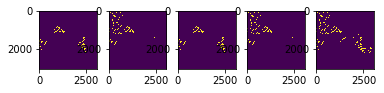

In [26]:
element_name = 'santa_monica'
channel_name = 'channel'
label_name = 'class'
plt.figure()
for i, element in enumerate(elements):    
    element_new = element.zfill(3)
    
#     pre =  np.array(Image.open(f'{sample_dir}/{element}/pre.png'))
#     post = np.array(Image.open(f'{sample_dir}/{element}/post.png'))
    
    mask = np.array(Image.open(f'{sample_dir}/{element}/mask.png'))#[:,:,0]!=104).astype(np.uint8)[:,:,None]
    (values, counts) = np.unique(mask[:,:,0],return_counts=True)
    threshold = values[np.argmax(counts)]
    mask = (mask[:,:,0]!=threshold).astype(np.uint8)[:,:,None]
    
    plt.subplot(1, len(elements), i+1)
    plt.imshow(mask.squeeze())
    print(mask.shape)
    mask_img = Image.fromarray((mask.squeeze()*255).astype(np.uint8))
    mask_img.save(f'{sample_dir}/{element}/mask_bin.png')

#     img_to_bc(pre, channels_pre, profile, f'{save_dir}/{element_new}', element_name, channel_name)
#     img_to_bc(post, channels_post, profile, f'{save_dir}/{element_new}', element_name, channel_name)
#     img_to_bc(mask, output_labels, profile, f'{save_dir}/{element_new}', element_name, label_name)

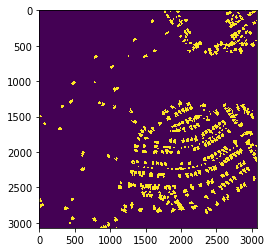

In [8]:
plt.imshow(mask.squeeze())

In [10]:
dataset_elements = os.listdir(save_dir)
bc = {}
for element in dataset_elements:
    bands = parse_directory(f'{save_dir}/{element}', channels_pre+channels_post+output_labels)
    bc[element] = BandCollection(bands)

In [22]:
bc.keys()

dict_keys(['009', '003', '001', '010', '007', '002', '008', '005', '006', '004'])

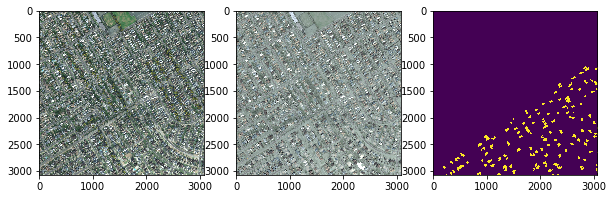

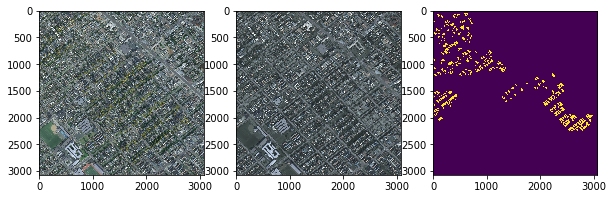

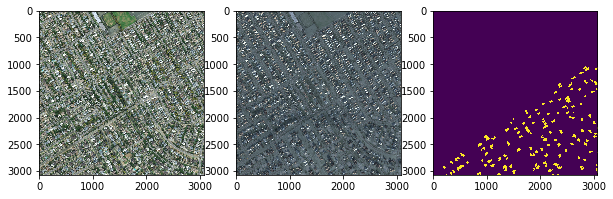

In [23]:

for element in ['009', '003', '010']:
    plt.figure(figsize = (10,10))
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.axis('off')
    
    plt.subplot(1,3,1)
    plt.imshow(bc[element].ordered(*channels_pre).numpy().transpose(1,2,0))
    
    plt.subplot(1,3,2)
    plt.imshow(bc[element].ordered(*channels_post).numpy().transpose(1,2,0))
    
    plt.subplot(1,3,3)
    plt.imshow(bc[element].ordered(*output_labels).numpy().squeeze())
    

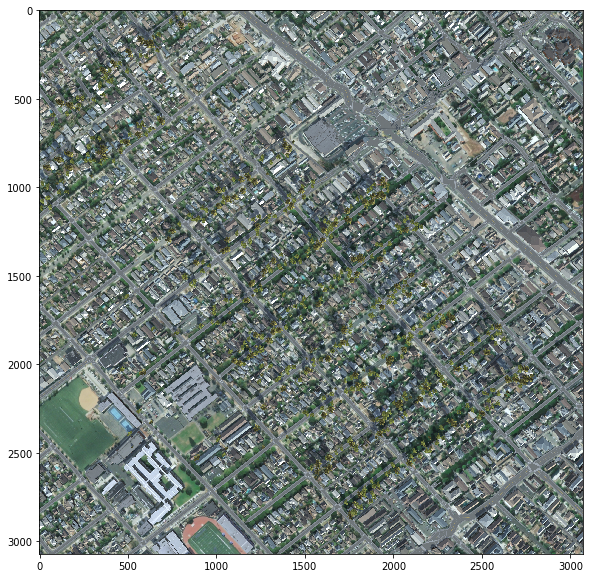

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(bc[element].ordered(*channels_pre).numpy().transpose(1,2,0).astype(np.uint8))

In [46]:
files = [f'{save_dir}/001/{element_name}_channel_{ch}.tif' for ch in channels_pre]
bands = []

for file in files:
    with rasterio.open(file) as src:
        bands.append(src.read().squeeze()[:,:,None])